In [7]:
!pip install sklearn

In [1]:
!pip install yfinance

In [2]:
!pip install tensorflow

In [3]:
!pip install pandas_datareader

In [1]:
import yfinance as yf

In [2]:
import pandas_datareader as pdr
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
from datetime import datetime
import math

In [3]:
yf.pdr_override()

In [4]:
ticker = pd.read_csv("E:/kartik/kartik/miniproject/NSE_Yahoo_tickers-master/NIFTY500.csv")

In [5]:
pd.set_option('display.max_rows', 600)
pd.set_option('display.max_columns',4)
ticker

,Company,Symbol,ISIN Code
0,3M India Ltd.,3MINDIA.NS,INE470A01017
1,8K Miles Soft Services Ltd.,8KMILES.NS,INE650K01021
2,ABB India Ltd.,ABB.NS,INE117A01022
3,ACC Ltd.,ACC.NS,INE012A01025
4,AIA Engineering Ltd.,AIAENG.NS,INE212H01026
5,APL Apollo Tubes Ltd.,APLAPOLLO.NS,INE702C01019
6,AU Small Finance Bank Ltd.,AUBANK.NS,INE949L01017
7,Aarti Industries Ltd.,AARTIIND.NS,INE769A01020
8,Adani Green Energy Ltd.,ADANIGREEN.NS,INE364U01010
9,Adani Ports and Special Economic Zone Ltd.,ADANIPORTS.NS,INE742F01042


In [6]:
ticker[["Company","Symbol"]]

,Company,Symbol
0,3M India Ltd.,3MINDIA.NS
1,8K Miles Soft Services Ltd.,8KMILES.NS
2,ABB India Ltd.,ABB.NS
3,ACC Ltd.,ACC.NS
4,AIA Engineering Ltd.,AIAENG.NS
5,APL Apollo Tubes Ltd.,APLAPOLLO.NS
6,AU Small Finance Bank Ltd.,AUBANK.NS
7,Aarti Industries Ltd.,AARTIIND.NS
8,Adani Green Energy Ltd.,ADANIGREEN.NS
9,Adani Ports and Special Economic Zone Ltd.,ADANIPORTS.NS


In [7]:
stock = int(input(print("Select one stock.")))

Select one stock.
None5


In [8]:
name = ticker.iloc[stock][1]
company = ticker.iloc[stock][0]
print(company)
startdate = datetime(2010,1,1)
enddate = datetime.now()

APL Apollo Tubes Ltd.


In [9]:
print(company)
df = pdr.data.get_data_yahoo(name, start=startdate, end=enddate)
pd.set_option('display.max_rows', len(df))
pd.set_option('display.max_columns', len(df.columns))
df

APL Apollo Tubes Ltd.
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-12-14,15.980000,15.980000,14.100000,14.570000,12.891180,955340
2011-12-15,14.005000,14.500000,14.005000,14.200000,12.563813,57800
2011-12-16,14.460000,14.685000,13.795000,14.060000,12.439945,37760
2011-12-19,13.205000,14.350000,13.205000,13.705000,12.125849,13690
2011-12-20,13.700000,14.000000,13.600000,13.600000,12.032948,4680
2011-12-21,13.850000,13.850000,13.300000,13.355000,11.816177,3030
2011-12-22,13.200000,13.445000,13.160000,13.165000,11.648070,38700
2011-12-23,13.445000,13.950000,13.310000,13.320000,11.785210,40020
2011-12-26,13.700000,13.700000,13.400000,13.695000,12.117002,1260


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2954 entries, 2011-12-14 to 2023-12-05
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2954 non-null   float64
 1   High       2954 non-null   float64
 2   Low        2954 non-null   float64
 3   Close      2954 non-null   float64
 4   Adj Close  2954 non-null   float64
 5   Volume     2954 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 161.5 KB


In [11]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-12-14,15.980,15.980,14.100,14.570,12.891180,955340
2011-12-15,14.005,14.500,14.005,14.200,12.563813,57800
2011-12-16,14.460,14.685,13.795,14.060,12.439945,37760
2011-12-19,13.205,14.350,13.205,13.705,12.125849,13690
2011-12-20,13.700,14.000,13.600,13.600,12.032948,4680


In [12]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-29,1675.000000,1682.300049,1632.949951,1651.099976,1651.099976,1054257
2023-11-30,1665.000000,1774.000000,1636.800049,1687.650024,1687.650024,23444898
2023-12-01,1700.000000,1745.000000,1640.500000,1644.949951,1644.949951,1054816
2023-12-04,1693.000000,1694.000000,1609.099976,1618.699951,1618.699951,1373108
2023-12-05,1624.900024,1642.900024,1582.000000,1594.750000,1594.750000,931794


In [13]:
df1=df.reset_index()['Close']

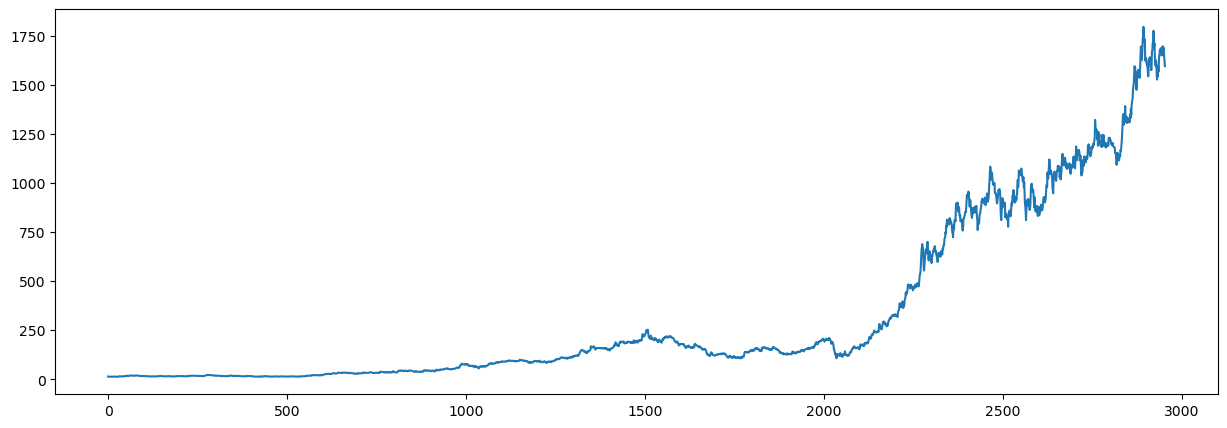

In [14]:
plt.figure(figsize=(15,5))
plt.plot(df1)

In [15]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [16]:
df1

0         14.570000
1         14.200000
2         14.060000
3         13.705000
4         13.600000
5         13.355000
6         13.165000
7         13.320000
8         13.695000
9         13.745000
10        13.480000
11        13.645000
12        14.045000
13        13.945000
14        13.750000
15        13.825000
16        13.900000
17        13.900000
18        13.540000
19        14.030000
20        13.975000
21        13.220000
22        13.500000
23        13.400000
24        13.400000
25        13.500000
26        13.555000
27        13.850000
28        13.330000
29        13.645000
30        14.980000
31        15.960000
32        15.690000
33        15.885000
34        15.595000
35        15.200000
36        15.290000
37        15.380000
38        15.615000
39        15.610000
40        15.155000
41        15.005000
42        14.735000
43        14.675000
44        14.620000
45        16.504999
46        16.459999
47        16.340000
48        16.870001
49        16.910000


In [17]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [18]:
print(df1)

[[7.88380058e-04]
 [5.80763982e-04]
 [5.02206866e-04]
 ...
 [9.15634846e-01]
 [9.00905323e-01]
 [8.87466413e-01]]


In [19]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [20]:
training_size,test_size

(1920, 1034)

In [21]:
train_data

array([[0.00078838],
       [0.00058076],
       [0.00050221],
       ...,
       [0.06905762],
       [0.06896223],
       [0.0672031 ]])

In [22]:
# convert an array of values into a dataset matrix
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]  
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [23]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [24]:
print(X_train.shape), print(y_train.shape)

(1819, 100)
(1819,)


(None, None)

In [25]:
print(X_test.shape), print(ytest.shape)

(933, 100)
(933,)


(None, None)

In [26]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [27]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [28]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
29/29 [==============================] - 8s 159ms/step - loss: 3.4445e-04 - val_loss: 0.0125
Epoch 2/100
29/29 [==============================] - 4s 126ms/step - loss: 2.4224e-05 - val_loss: 0.0057
Epoch 3/100
29/29 [==============================] - 4s 137ms/step - loss: 1.7401e-05 - val_loss: 0.0063
Epoch 4/100
29/29 [==============================] - 4s 131ms/step - loss: 1.6696e-05 - val_loss: 0.0059
Epoch 5/100
29/29 [==============================] - 4s 128ms/step - loss: 1.5926e-05 - val_loss: 0.0077
Epoch 6/100
29/29 [==============================] - 4s 126ms/step - loss: 1.5835e-05 - val_loss: 0.0076
Epoch 7/100
29/29 [==============================] - 4s 123ms/step - loss: 1.5013e-05 - val_loss: 0.0097
Epoch 8/100
29/29 [==============================] - 4s 123ms/step - loss: 1.4789e-05 - val_loss: 0.0072
Epoch 9/100
29/29 [==============================] - 4s 128ms/step - loss: 1.4477e-05 - val_loss: 0.0081
Epoch 10/100
29/29 [==============================] - 4

29/29 [==============================] - 4s 134ms/step - loss: 6.1891e-06 - val_loss: 0.0043
Epoch 79/100
29/29 [==============================] - 4s 137ms/step - loss: 1.1473e-05 - val_loss: 0.0048
Epoch 80/100
29/29 [==============================] - 4s 131ms/step - loss: 6.2365e-06 - val_loss: 0.0051
Epoch 81/100
29/29 [==============================] - 4s 130ms/step - loss: 5.7664e-06 - val_loss: 0.0051
Epoch 82/100
29/29 [==============================] - 4s 130ms/step - loss: 5.0207e-06 - val_loss: 0.0049
Epoch 83/100
29/29 [==============================] - 4s 130ms/step - loss: 4.8639e-06 - val_loss: 0.0033
Epoch 84/100
29/29 [==============================] - 4s 132ms/step - loss: 5.6685e-06 - val_loss: 0.0035
Epoch 85/100
29/29 [==============================] - 4s 132ms/step - loss: 6.1232e-06 - val_loss: 0.0050
Epoch 86/100
29/29 [==============================] - 4s 133ms/step - loss: 6.9492e-06 - val_loss: 0.0040
Epoch 87/100
29/29 [==============================] - 4s 12

In [32]:
import tensorflow as tf

In [33]:
tf.__version__

'2.12.0'

In [34]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

30/30 [==============================] - 1s 22ms/step


In [35]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [36]:
### Calculate RMSE performance metrics
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

104.63337529666677

In [37]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

860.5289149891428

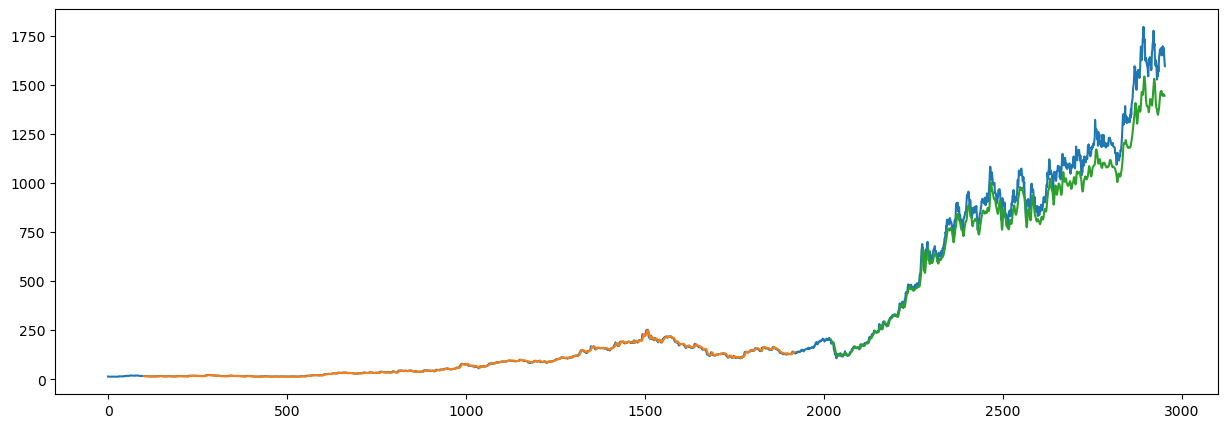

In [38]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.figure(figsize=(15,5))
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [39]:
len(test_data)

1034

In [40]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 693)

In [41]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [42]:
temp_input

[0.2614195754286379,
 0.26648373957254157,
 0.2657542671841421,
 0.26446368721691016,
 0.2583053401766578,
 0.26600678015015866,
 0.2772432989028893,
 0.29078043236275103,
 0.2935720140608397,
 0.29918326109083426,
 0.31733566578186684,
 0.34139388742296833,
 0.3612296319746654,
 0.36879080789658336,
 0.37924175548994815,
 0.36482084377319546,
 0.3673178555512098,
 0.3454339921342312,
 0.3137164045978536,
 0.30334963940927234,
 0.3182334516073324,
 0.33478663034581624,
 0.34460631264830666,
 0.352798753861099,
 0.36343203958427145,
 0.35487488786352983,
 0.3547065573022968,
 0.3668128296191767,
 0.3837447606825184,
 0.38563855655514157,
 0.36484889315867863,
 0.3392616204012372,
 0.3325281239652438,
 0.3416464003889849,
 0.34867446674505265,
 0.3583959590741849,
 0.33778866805586366,
 0.33600706972517325,
 0.3364279132524228,
 0.34567246328333917,
 0.3250932216505011,
 0.34588288504696396,
 0.3426283686192339,
 0.350764676812726,
 0.3538789120647062,
 0.3610192102110406,
 0.36327775083

In [43]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=len(temp_input)-1
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.26648374 0.26575427 0.26446369 0.25830534 0.26600678 0.2772433
 0.29078043 0.29357201 0.29918326 0.31733567 0.34139389 0.36122963
 0.36879081 0.37924176 0.36482084 0.36731786 0.34543399 0.3137164
 0.30334964 0.31823345 0.33478663 0.34460631 0.35279875 0.36343204
 0.35487489 0.35470656 0.36681283 0.38374476 0.38563856 0.36484889
 0.33926162 0.33252812 0.3416464  0.34867447 0.35839596 0.33778867
 0.33600707 0.33642791 0.34567246 0.32509322 0.34588289 0.34262837
 0.35076468 0.35387891 0.36101921 0.36327775 0.36580281 0.35797512
 0.37305534 0.36197313 0.35814345 0.35906932 0.35223763 0.34575661
 0.3431474  0.34309127 0.3279409  0.34483078 0.34473259 0.35408933
 0.34801515 0.34417146 0.3442416  0.34938991 0.34310531 0.35832582
 0.35674063 0.3576665  0.35661439 0.34946006 0.36698116 0.36369859
 0.37088098 0.37724974 0.37671669 0.39255443 0.39666467 0.39834804
 0.41306353 0.41004748 0.43152454 0.42745639 0.44845647 0.44393943
 0.43828609 0.44890537 0.44678714 0.44245243 0.43487

3 day output [[0.65341705]]
4 day input [0.26600678 0.2772433  0.29078043 0.29357201 0.29918326 0.31733567
 0.34139389 0.36122963 0.36879081 0.37924176 0.36482084 0.36731786
 0.34543399 0.3137164  0.30334964 0.31823345 0.33478663 0.34460631
 0.35279875 0.36343204 0.35487489 0.35470656 0.36681283 0.38374476
 0.38563856 0.36484889 0.33926162 0.33252812 0.3416464  0.34867447
 0.35839596 0.33778867 0.33600707 0.33642791 0.34567246 0.32509322
 0.34588289 0.34262837 0.35076468 0.35387891 0.36101921 0.36327775
 0.36580281 0.35797512 0.37305534 0.36197313 0.35814345 0.35906932
 0.35223763 0.34575661 0.3431474  0.34309127 0.3279409  0.34483078
 0.34473259 0.35408933 0.34801515 0.34417146 0.3442416  0.34938991
 0.34310531 0.35832582 0.35674063 0.3576665  0.35661439 0.34946006
 0.36698116 0.36369859 0.37088098 0.37724974 0.37671669 0.39255443
 0.39666467 0.39834804 0.41306353 0.41004748 0.43152454 0.42745639
 0.44845647 0.44393943 0.43828609 0.44890537 0.44678714 0.44245243
 0.43487725 0.44973305

5 day output [[0.5594756]]
6 day input [0.29078043 0.29357201 0.29918326 0.31733567 0.34139389 0.36122963
 0.36879081 0.37924176 0.36482084 0.36731786 0.34543399 0.3137164
 0.30334964 0.31823345 0.33478663 0.34460631 0.35279875 0.36343204
 0.35487489 0.35470656 0.36681283 0.38374476 0.38563856 0.36484889
 0.33926162 0.33252812 0.3416464  0.34867447 0.35839596 0.33778867
 0.33600707 0.33642791 0.34567246 0.32509322 0.34588289 0.34262837
 0.35076468 0.35387891 0.36101921 0.36327775 0.36580281 0.35797512
 0.37305534 0.36197313 0.35814345 0.35906932 0.35223763 0.34575661
 0.3431474  0.34309127 0.3279409  0.34483078 0.34473259 0.35408933
 0.34801515 0.34417146 0.3442416  0.34938991 0.34310531 0.35832582
 0.35674063 0.3576665  0.35661439 0.34946006 0.36698116 0.36369859
 0.37088098 0.37724974 0.37671669 0.39255443 0.39666467 0.39834804
 0.41306353 0.41004748 0.43152454 0.42745639 0.44845647 0.44393943
 0.43828609 0.44890537 0.44678714 0.44245243 0.43487725 0.44973305
 0.45346451 0.44997152 0

7 day output [[0.48349527]]
8 day input [0.29918326 0.31733567 0.34139389 0.36122963 0.36879081 0.37924176
 0.36482084 0.36731786 0.34543399 0.3137164  0.30334964 0.31823345
 0.33478663 0.34460631 0.35279875 0.36343204 0.35487489 0.35470656
 0.36681283 0.38374476 0.38563856 0.36484889 0.33926162 0.33252812
 0.3416464  0.34867447 0.35839596 0.33778867 0.33600707 0.33642791
 0.34567246 0.32509322 0.34588289 0.34262837 0.35076468 0.35387891
 0.36101921 0.36327775 0.36580281 0.35797512 0.37305534 0.36197313
 0.35814345 0.35906932 0.35223763 0.34575661 0.3431474  0.34309127
 0.3279409  0.34483078 0.34473259 0.35408933 0.34801515 0.34417146
 0.3442416  0.34938991 0.34310531 0.35832582 0.35674063 0.3576665
 0.35661439 0.34946006 0.36698116 0.36369859 0.37088098 0.37724974
 0.37671669 0.39255443 0.39666467 0.39834804 0.41306353 0.41004748
 0.43152454 0.42745639 0.44845647 0.44393943 0.43828609 0.44890537
 0.44678714 0.44245243 0.43487725 0.44973305 0.45346451 0.44997152
 0.44652059 0.44082519 

10 day output [[0.40600908]]
11 day input [0.36122963 0.36879081 0.37924176 0.36482084 0.36731786 0.34543399
 0.3137164  0.30334964 0.31823345 0.33478663 0.34460631 0.35279875
 0.36343204 0.35487489 0.35470656 0.36681283 0.38374476 0.38563856
 0.36484889 0.33926162 0.33252812 0.3416464  0.34867447 0.35839596
 0.33778867 0.33600707 0.33642791 0.34567246 0.32509322 0.34588289
 0.34262837 0.35076468 0.35387891 0.36101921 0.36327775 0.36580281
 0.35797512 0.37305534 0.36197313 0.35814345 0.35906932 0.35223763
 0.34575661 0.3431474  0.34309127 0.3279409  0.34483078 0.34473259
 0.35408933 0.34801515 0.34417146 0.3442416  0.34938991 0.34310531
 0.35832582 0.35674063 0.3576665  0.35661439 0.34946006 0.36698116
 0.36369859 0.37088098 0.37724974 0.37671669 0.39255443 0.39666467
 0.39834804 0.41306353 0.41004748 0.43152454 0.42745639 0.44845647
 0.44393943 0.43828609 0.44890537 0.44678714 0.44245243 0.43487725
 0.44973305 0.45346451 0.44997152 0.44652059 0.44082519 0.44169493
 0.43702356 0.425716

13 day output [[0.36053956]]
14 day input [0.36482084 0.36731786 0.34543399 0.3137164  0.30334964 0.31823345
 0.33478663 0.34460631 0.35279875 0.36343204 0.35487489 0.35470656
 0.36681283 0.38374476 0.38563856 0.36484889 0.33926162 0.33252812
 0.3416464  0.34867447 0.35839596 0.33778867 0.33600707 0.33642791
 0.34567246 0.32509322 0.34588289 0.34262837 0.35076468 0.35387891
 0.36101921 0.36327775 0.36580281 0.35797512 0.37305534 0.36197313
 0.35814345 0.35906932 0.35223763 0.34575661 0.3431474  0.34309127
 0.3279409  0.34483078 0.34473259 0.35408933 0.34801515 0.34417146
 0.3442416  0.34938991 0.34310531 0.35832582 0.35674063 0.3576665
 0.35661439 0.34946006 0.36698116 0.36369859 0.37088098 0.37724974
 0.37671669 0.39255443 0.39666467 0.39834804 0.41306353 0.41004748
 0.43152454 0.42745639 0.44845647 0.44393943 0.43828609 0.44890537
 0.44678714 0.44245243 0.43487725 0.44973305 0.45346451 0.44997152
 0.44652059 0.44082519 0.44169493 0.43702356 0.42571688 0.41264268
 0.41086112 0.3987688

16 day output [[0.33079246]]
17 day input [0.3137164  0.30334964 0.31823345 0.33478663 0.34460631 0.35279875
 0.36343204 0.35487489 0.35470656 0.36681283 0.38374476 0.38563856
 0.36484889 0.33926162 0.33252812 0.3416464  0.34867447 0.35839596
 0.33778867 0.33600707 0.33642791 0.34567246 0.32509322 0.34588289
 0.34262837 0.35076468 0.35387891 0.36101921 0.36327775 0.36580281
 0.35797512 0.37305534 0.36197313 0.35814345 0.35906932 0.35223763
 0.34575661 0.3431474  0.34309127 0.3279409  0.34483078 0.34473259
 0.35408933 0.34801515 0.34417146 0.3442416  0.34938991 0.34310531
 0.35832582 0.35674063 0.3576665  0.35661439 0.34946006 0.36698116
 0.36369859 0.37088098 0.37724974 0.37671669 0.39255443 0.39666467
 0.39834804 0.41306353 0.41004748 0.43152454 0.42745639 0.44845647
 0.44393943 0.43828609 0.44890537 0.44678714 0.44245243 0.43487725
 0.44973305 0.45346451 0.44997152 0.44652059 0.44082519 0.44169493
 0.43702356 0.42571688 0.41264268 0.41086112 0.39876889 0.41828198
 0.43332015 0.422237

18 day output [[0.31448168]]
19 day input [0.31823345 0.33478663 0.34460631 0.35279875 0.36343204 0.35487489
 0.35470656 0.36681283 0.38374476 0.38563856 0.36484889 0.33926162
 0.33252812 0.3416464  0.34867447 0.35839596 0.33778867 0.33600707
 0.33642791 0.34567246 0.32509322 0.34588289 0.34262837 0.35076468
 0.35387891 0.36101921 0.36327775 0.36580281 0.35797512 0.37305534
 0.36197313 0.35814345 0.35906932 0.35223763 0.34575661 0.3431474
 0.34309127 0.3279409  0.34483078 0.34473259 0.35408933 0.34801515
 0.34417146 0.3442416  0.34938991 0.34310531 0.35832582 0.35674063
 0.3576665  0.35661439 0.34946006 0.36698116 0.36369859 0.37088098
 0.37724974 0.37671669 0.39255443 0.39666467 0.39834804 0.41306353
 0.41004748 0.43152454 0.42745639 0.44845647 0.44393943 0.43828609
 0.44890537 0.44678714 0.44245243 0.43487725 0.44973305 0.45346451
 0.44997152 0.44652059 0.44082519 0.44169493 0.43702356 0.42571688
 0.41264268 0.41086112 0.39876889 0.41828198 0.43332015 0.42223794
 0.44410776 0.4487089

20 day output [[0.2995324]]
21 day input [0.34460631 0.35279875 0.36343204 0.35487489 0.35470656 0.36681283
 0.38374476 0.38563856 0.36484889 0.33926162 0.33252812 0.3416464
 0.34867447 0.35839596 0.33778867 0.33600707 0.33642791 0.34567246
 0.32509322 0.34588289 0.34262837 0.35076468 0.35387891 0.36101921
 0.36327775 0.36580281 0.35797512 0.37305534 0.36197313 0.35814345
 0.35906932 0.35223763 0.34575661 0.3431474  0.34309127 0.3279409
 0.34483078 0.34473259 0.35408933 0.34801515 0.34417146 0.3442416
 0.34938991 0.34310531 0.35832582 0.35674063 0.3576665  0.35661439
 0.34946006 0.36698116 0.36369859 0.37088098 0.37724974 0.37671669
 0.39255443 0.39666467 0.39834804 0.41306353 0.41004748 0.43152454
 0.42745639 0.44845647 0.44393943 0.43828609 0.44890537 0.44678714
 0.44245243 0.43487725 0.44973305 0.45346451 0.44997152 0.44652059
 0.44082519 0.44169493 0.43702356 0.42571688 0.41264268 0.41086112
 0.39876889 0.41828198 0.43332015 0.42223794 0.44410776 0.44870899
 0.44782521 0.44421999 0

23 day output [[0.27943867]]
24 day input [0.35487489 0.35470656 0.36681283 0.38374476 0.38563856 0.36484889
 0.33926162 0.33252812 0.3416464  0.34867447 0.35839596 0.33778867
 0.33600707 0.33642791 0.34567246 0.32509322 0.34588289 0.34262837
 0.35076468 0.35387891 0.36101921 0.36327775 0.36580281 0.35797512
 0.37305534 0.36197313 0.35814345 0.35906932 0.35223763 0.34575661
 0.3431474  0.34309127 0.3279409  0.34483078 0.34473259 0.35408933
 0.34801515 0.34417146 0.3442416  0.34938991 0.34310531 0.35832582
 0.35674063 0.3576665  0.35661439 0.34946006 0.36698116 0.36369859
 0.37088098 0.37724974 0.37671669 0.39255443 0.39666467 0.39834804
 0.41306353 0.41004748 0.43152454 0.42745639 0.44845647 0.44393943
 0.43828609 0.44890537 0.44678714 0.44245243 0.43487725 0.44973305
 0.45346451 0.44997152 0.44652059 0.44082519 0.44169493 0.43702356
 0.42571688 0.41264268 0.41086112 0.39876889 0.41828198 0.43332015
 0.42223794 0.44410776 0.44870899 0.44782521 0.44421999 0.48376524
 0.49505787 0.495366

26 day output [[0.26282045]]
27 day input [0.38374476 0.38563856 0.36484889 0.33926162 0.33252812 0.3416464
 0.34867447 0.35839596 0.33778867 0.33600707 0.33642791 0.34567246
 0.32509322 0.34588289 0.34262837 0.35076468 0.35387891 0.36101921
 0.36327775 0.36580281 0.35797512 0.37305534 0.36197313 0.35814345
 0.35906932 0.35223763 0.34575661 0.3431474  0.34309127 0.3279409
 0.34483078 0.34473259 0.35408933 0.34801515 0.34417146 0.3442416
 0.34938991 0.34310531 0.35832582 0.35674063 0.3576665  0.35661439
 0.34946006 0.36698116 0.36369859 0.37088098 0.37724974 0.37671669
 0.39255443 0.39666467 0.39834804 0.41306353 0.41004748 0.43152454
 0.42745639 0.44845647 0.44393943 0.43828609 0.44890537 0.44678714
 0.44245243 0.43487725 0.44973305 0.45346451 0.44997152 0.44652059
 0.44082519 0.44169493 0.43702356 0.42571688 0.41264268 0.41086112
 0.39876889 0.41828198 0.43332015 0.42223794 0.44410776 0.44870899
 0.44782521 0.44421999 0.48376524 0.49505787 0.49536649 0.48250271
 0.49017608 0.49748474 

28 day output [[0.25385877]]
29 day input [0.36484889 0.33926162 0.33252812 0.3416464  0.34867447 0.35839596
 0.33778867 0.33600707 0.33642791 0.34567246 0.32509322 0.34588289
 0.34262837 0.35076468 0.35387891 0.36101921 0.36327775 0.36580281
 0.35797512 0.37305534 0.36197313 0.35814345 0.35906932 0.35223763
 0.34575661 0.3431474  0.34309127 0.3279409  0.34483078 0.34473259
 0.35408933 0.34801515 0.34417146 0.3442416  0.34938991 0.34310531
 0.35832582 0.35674063 0.3576665  0.35661439 0.34946006 0.36698116
 0.36369859 0.37088098 0.37724974 0.37671669 0.39255443 0.39666467
 0.39834804 0.41306353 0.41004748 0.43152454 0.42745639 0.44845647
 0.44393943 0.43828609 0.44890537 0.44678714 0.44245243 0.43487725
 0.44973305 0.45346451 0.44997152 0.44652059 0.44082519 0.44169493
 0.43702356 0.42571688 0.41264268 0.41086112 0.39876889 0.41828198
 0.43332015 0.42223794 0.44410776 0.44870899 0.44782521 0.44421999
 0.48376524 0.49505787 0.49536649 0.48250271 0.49017608 0.49748474
 0.47679327 0.471883

In [44]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [45]:
len(df1)

2954

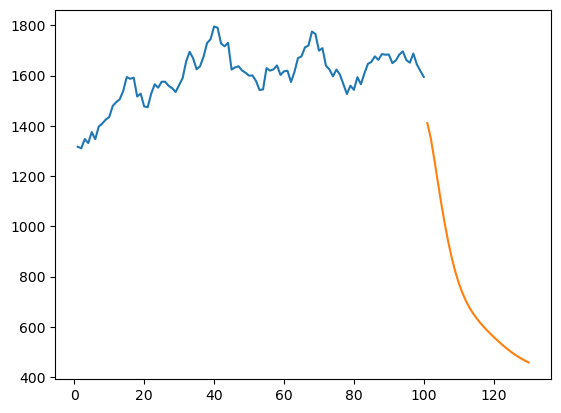

In [46]:
plt.plot(day_new,scaler.inverse_transform(df1[-100:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

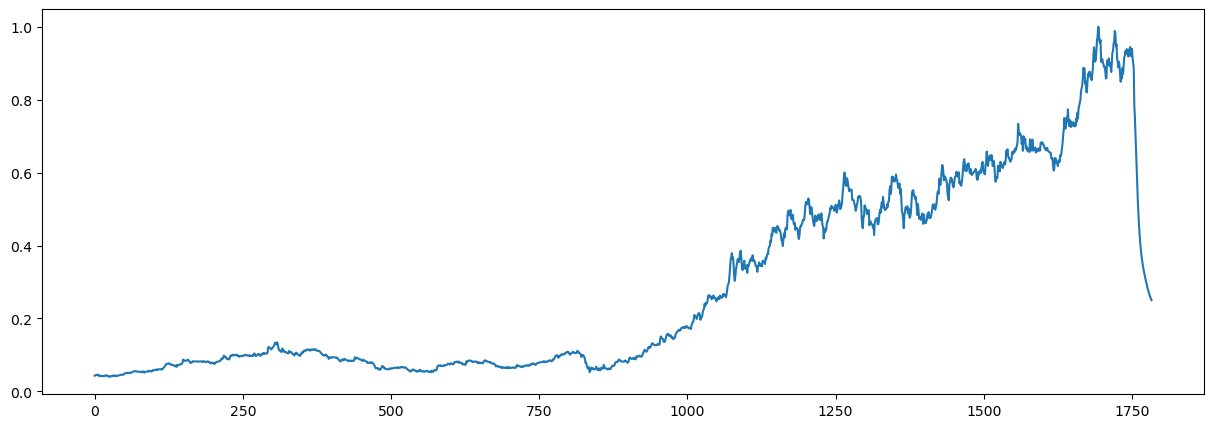

In [47]:
df3=df1.tolist()
df3.extend(lst_output)
plt.figure(figsize=(15,5))
plt.plot(df3[1200:])

In [48]:
df3=scaler.inverse_transform(df3).tolist()

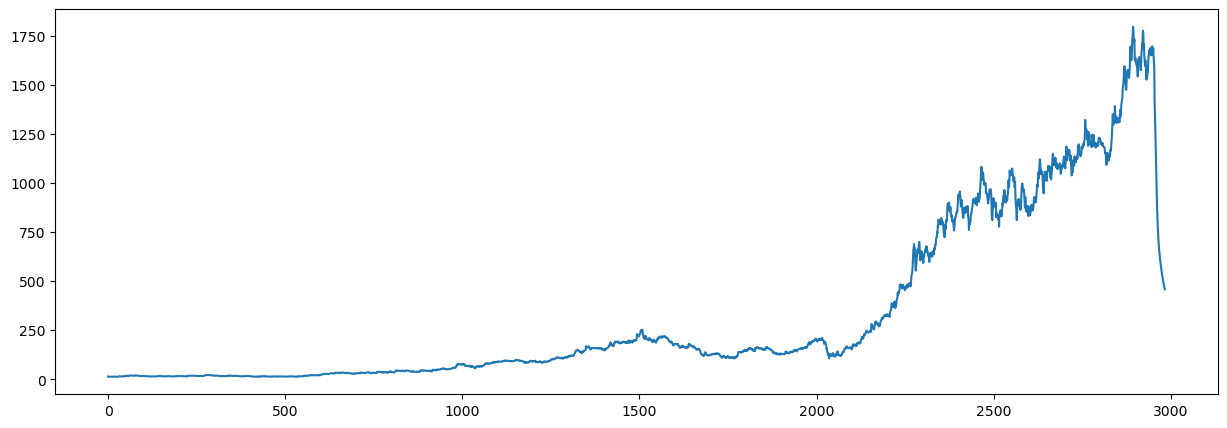

In [49]:
plt.figure(figsize=(15,5))
plt.plot(df3)